In [2]:
#!pip install nltk

# Importing Libraries

In [30]:
import numpy as np
import pandas as pd
import re # Regular expressions
import matplotlib.pyplot as plt
import nltk

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

# Importing Datasets

In [3]:
data = pd.read_csv("text_emotion.csv")
data

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [5]:
data.sentiment.unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

# Segregating Dataset into input and output

In [8]:
features = data.iloc[:,3]
labels = data.iloc[:,1]

In [9]:
features

0        @tiffanylue i know  i was listenin to bad habi...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @dannycastillo We want to trade with someone w...
                               ...                        
39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object

In [10]:
labels

0             empty
1           sadness
2           sadness
3        enthusiasm
4           neutral
            ...    
39995       neutral
39996          love
39997          love
39998     happiness
39999          love
Name: sentiment, Length: 40000, dtype: object

# Removing the Special Character

In [22]:
Processed_feature = []

for sentence in range(len(features)):
    # Remove all the special character
    processed_feature = re.sub(r'\W',' ',str(features[sentence]))
    
    #remove all single character
    processed_feature = re.sub(r'\s+[a-zA-z]',' ',processed_feature)
    
    #remove single character from start
    processed_feature = re.sub(r'\^[a-zA-z]',' ',processed_feature)
    
    #Substituting multiple spzces with single spaces
    processed_feature = re.sub(r'\s+',' ',processed_feature,flags=re.I)
    
    #removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+','',processed_feature)
    
    #converting to lowecase
    processed_feature = processed_feature.lower()
    
    Processed_feature.append(processed_feature)

In [34]:
Processed_feature[:20]

[' iffanylue now as istenin o ad abit arlier nd tarted reakin t is art ',
 'layin ed ith eadache ghhhh aitin n our all ',
 'funeral eremony loomy riday ',
 'wants o ang ut ith riends oon ',
 ' annycastillo e ant o rade ith omeone ho as ouston ickets ut o ne ill ',
 're inging hostridah14 hy idn ou o o rom c y f idn ike y riends',
 'i hould e leep ut m ot hinking bout n ld riend ho ant ut e arried ow amn mp e ants e 2 candalous ',
 'hmmm ttp ww jhero om s own',
 ' harviray harlene y ove iss ou',
 ' elcouch orry t east t riday ',
 'cant all sleep',
 'choked n er etainers',
 'ugh ave o eat his tupid ong o et o he ext ude ',
 ' rodyjenner f atch he ills n ondon ill ealise hat ourture t s ecause ere eeks nd eeks ate ust atch tonlinelol',
 'got he ews',
 'the torm s ere nd he lectricity s one',
 ' nnarosekerr greed',
 'so leepy gain nd t ot ven hat ate ail nce gain ',
 ' erezhilton ady aga weeted bout ot eing mpressed y er ideo eaking ust o ou now',
 'how re ou onvinced hat ave lways anted o

# Feature Extraction from text

In [35]:
vectorizer = TfidfVectorizer (max_features=2500,min_df=7,max_df=0.8,stop_words=stopwords.words("english"))
Processed_feature = vectorizer.fit_transform(Processed_feature).toarray()
print(Processed_feature)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Splting dataset into train and test

In [36]:
x_train,x_test,y_train,y_test = train_test_split(Processed_feature,labels,test_size=0.2)

In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((32000, 2500), (8000, 2500), (32000,), (8000,))

# Training Model

In [39]:
test_clf = RandomForestClassifier(n_estimators=100,random_state=0,verbose=True)
test_clf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.6min finished


RandomForestClassifier(random_state=0, verbose=True)

# Predicting the Test data with Trained Model

In [41]:
predictions = test_clf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


In [42]:
predictions

array(['sadness', 'sadness', 'sadness', ..., 'worry', 'worry',
       'happiness'], dtype=object)

# Score of the model

In [43]:
accuracy_score(y_test,predictions)

0.32225

# Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
cm = confusion_matrix(y_test,predictions)

In [47]:
cm

array([[  0,   0,   0,   0,   0,   2,   0,   0,   9,   0,   1,   0,   9],
       [  0,   1,   1,   0,   0,   1,   0,   0,  11,   0,   5,   1,  14],
       [  0,   0,   2,   1,   0,  15,   1,   2,  77,   1,  12,   2,  42],
       [  0,   0,   0,   1,   2,  25,   1,   6,  57,   2,   9,   2,  49],
       [  0,   0,   1,   0,   6,  58,   0,  20, 105,   1,  12,   1, 130],
       [  0,   0,   1,   0,  10, 329,   4,  98, 304,   7,  33,   5, 231],
       [  0,   0,   0,   0,   1,  10,  32,   4,  68,   0,  29,   1, 105],
       [  1,   0,   2,   0,   3, 163,   6, 277, 186,   3,  28,   4, 116],
       [  0,   1,   7,   5,   5, 154,  12,  68, 934,  12,  85,  12, 462],
       [  0,   0,   3,   2,   3,  73,   0,  20,  97,   6,  15,   1, 103],
       [  0,   0,   1,   0,   2,  49,  24,  30, 271,   2, 166,   9, 460],
       [  1,   0,   1,   0,   1,  65,   1,  27, 145,   2,  22,   7, 154],
       [  0,   0,   2,   3,   5, 132,  21,  59, 497,   2, 173,  10, 817]],
      dtype=int64)

<AxesSubplot:>

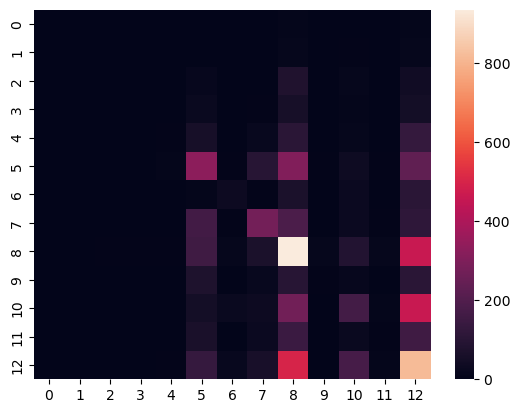

In [48]:
import seaborn as sns
sns.heatmap(cm)